# Explore

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import host, user, password

from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52441 non-null  float64
 1   bathrooms          52441 non-null  float64
 2   square_feet        52359 non-null  float64
 3   taxvaluedollarcnt  52440 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52358 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52358 non-null  float64
 1   bathrooms          52358 non-null  float64
 2   square_feet        52358 non-null  float64
 3   taxvaluedollarcnt  52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column         

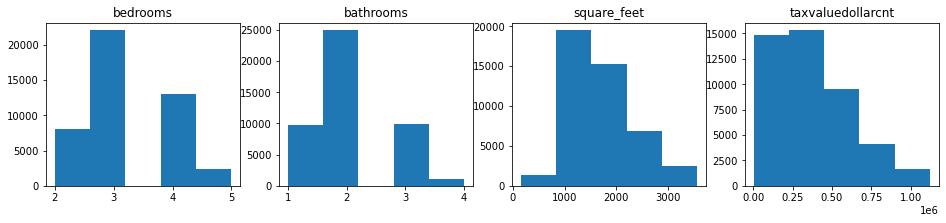

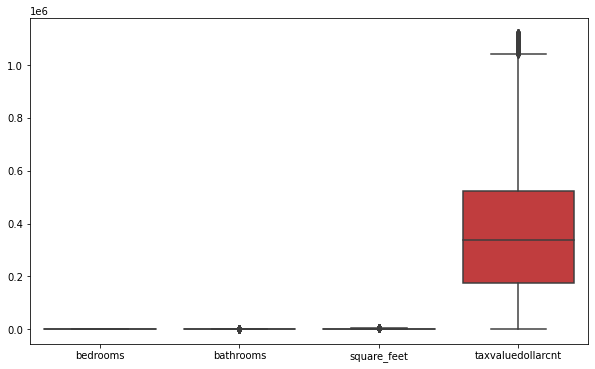

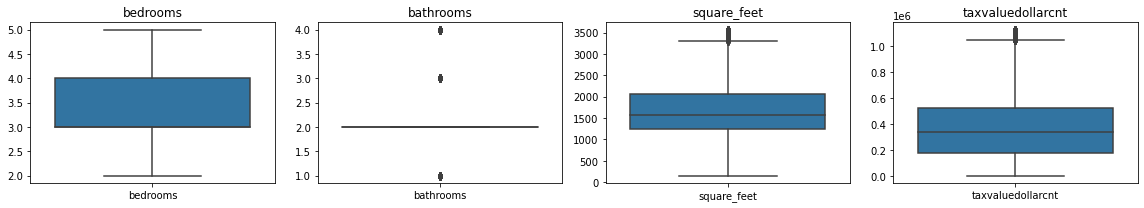

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   bedrooms           45433 non-null  int64
 1   bathrooms          45433 non-null  int64
 2   square_feet        45433 non-null  int64
 3   taxvaluedollarcnt  45433 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB
train -> (25442, 4)
validate -> (10904, 4)
test -> (9087, 4)
train -> (25442, 4)
validate -> (10904, 4)
test -> (9087, 4)


In [2]:
import wrangle

from wrangle import wrangle_zillow
from wrangle import split_data


In [3]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(wrangle_zillow, test_size = .2, random_state = 222)
    train, validate = train_test_split(train, test_size = .3, random_state = 222)
    
    return train, validate, test

In [4]:
train, validate, test = split_data(wrangle_zillow)



In [5]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (25442, 4)
validate -> (10904, 4)
test -> (9087, 4)


In [6]:
# viz 1

<AxesSubplot:xlabel='bedrooms', ylabel='taxvaluedollarcnt'>

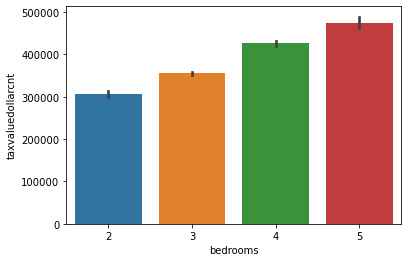

In [7]:
sns.barplot(x = 'bedrooms',y='taxvaluedollarcnt',data=train)



In [8]:
# viz 2

<AxesSubplot:xlabel='bathrooms', ylabel='taxvaluedollarcnt'>

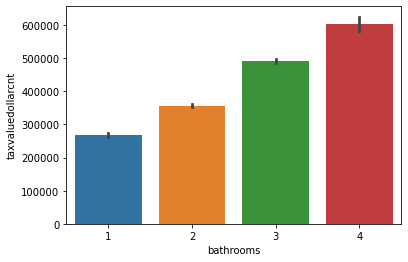

In [9]:
sns.barplot(x = 'bathrooms',y='taxvaluedollarcnt',data=train)



<AxesSubplot:xlabel='square_feet', ylabel='taxvaluedollarcnt'>

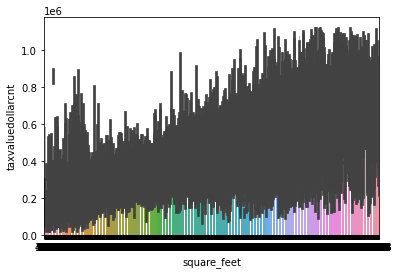

In [10]:
sns.barplot(x = 'square_feet',y='taxvaluedollarcnt',data=train)

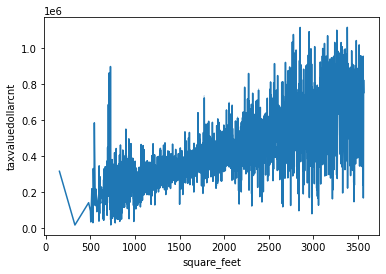

In [11]:
sns.lineplot(x="square_feet", y="taxvaluedollarcnt", ci=False,  data=train);


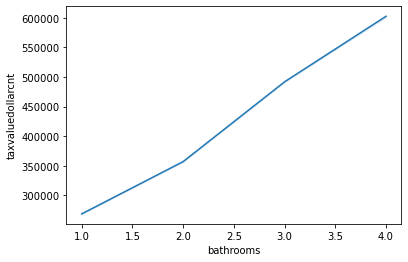

In [12]:
sns.lineplot(x="bathrooms", y="taxvaluedollarcnt", ci=False,  data=train);



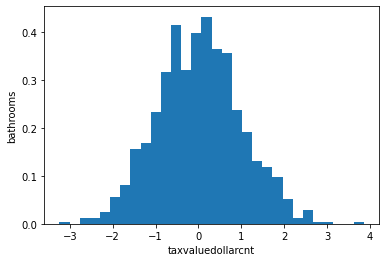

In [13]:
np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('bathrooms')
plt.xlabel('taxvaluedollarcnt');

In [14]:
# viz 3

In [15]:
def plot_variable_pairs(df):
    """
    Takes:
          df
    Returns:
          PairGrid plot of all relationships
          histogram and scatter plots
    """
    g = sns.PairGrid(df)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
    plt.show()

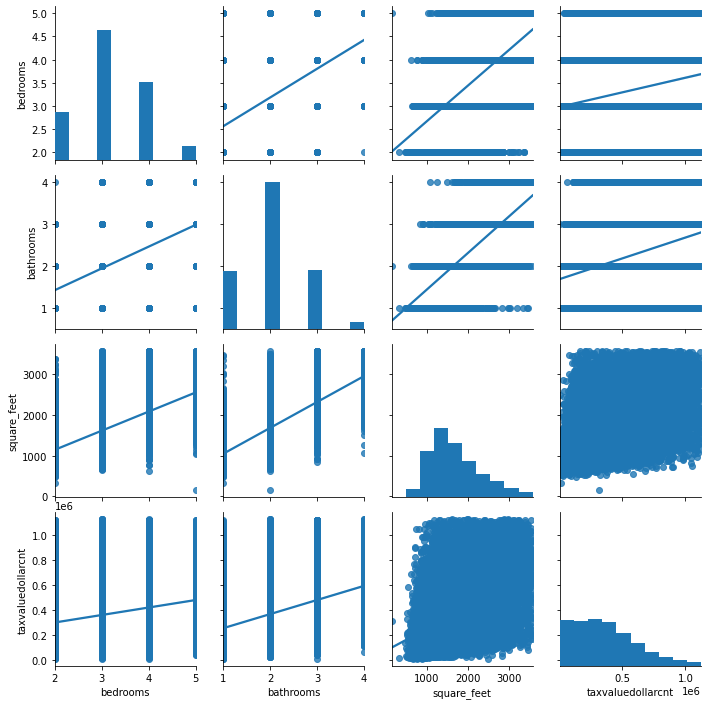

In [16]:
plot_variable_pairs(train)

In [17]:
# viz 3 same 

In [18]:
def plot_variable_pair(train):
    """
    Takes in a df and displays a PairGrid plot of all relationships,
    histogram and scatter plots.
    """
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
    plt.show()

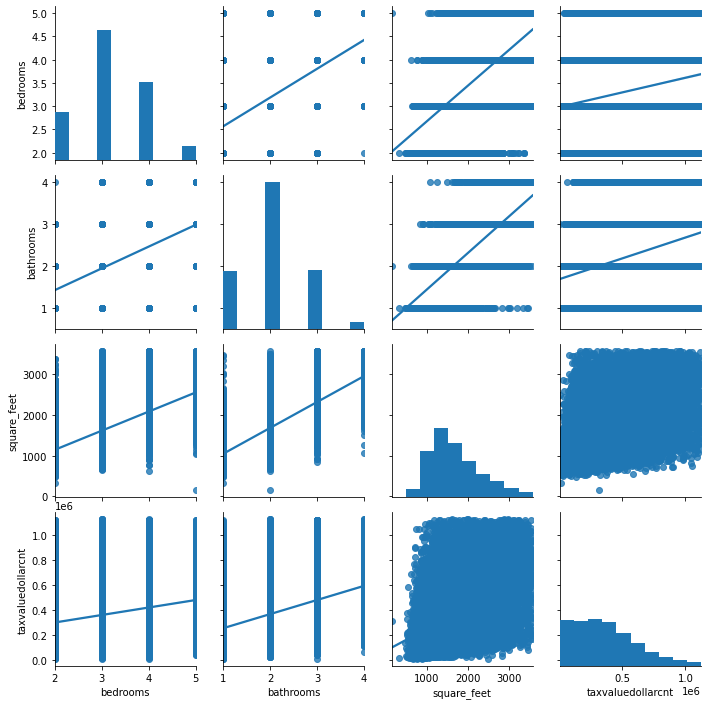

In [19]:
plot_variable_pair(train)

In [20]:
# viz 4

In [21]:
def plot_categorical_and_continuous_vars(train):
    """
    Takes in dataframe and the name of the columns that hold the continuous and categorical features
    and outputs 3 different plots for visualizing a categorical variable and a continuous variable"
    """
    sns.relplot(x="bedrooms", y="taxvaluedollarcnt", data=train)
    plt.show()
    
    sns.lmplot(x="bathrooms", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
    plt.show()
    
    sns.jointplot(x="square_feet", y="taxvaluedollarcnt", data=train,  kind='reg', height=5)
    plt.show()
    return train

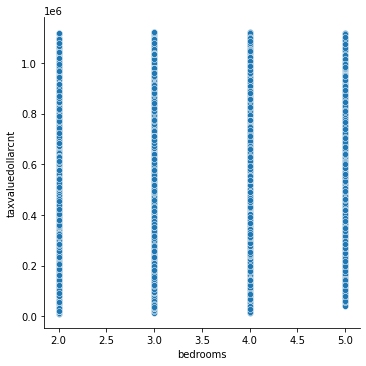

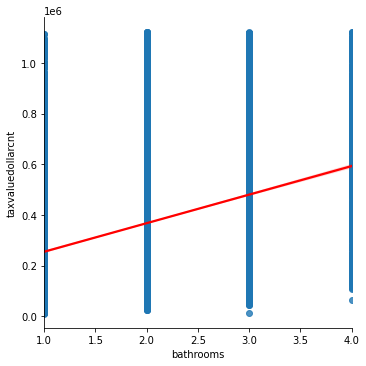

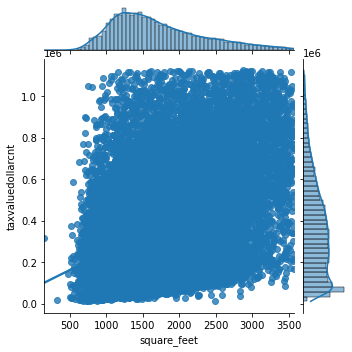

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
16190,2,1,1248,190289
36908,3,2,1408,109487
8097,3,1,1032,248300
38541,3,2,986,145660
618,3,1,948,224273
...,...,...,...,...
1662,3,1,1141,494000
27905,3,2,1734,258431
7373,3,1,942,183051
11511,2,2,1301,92726


In [22]:
zplot = plot_categorical_and_continuous_vars(train)
zplot

In [23]:
# viz 5

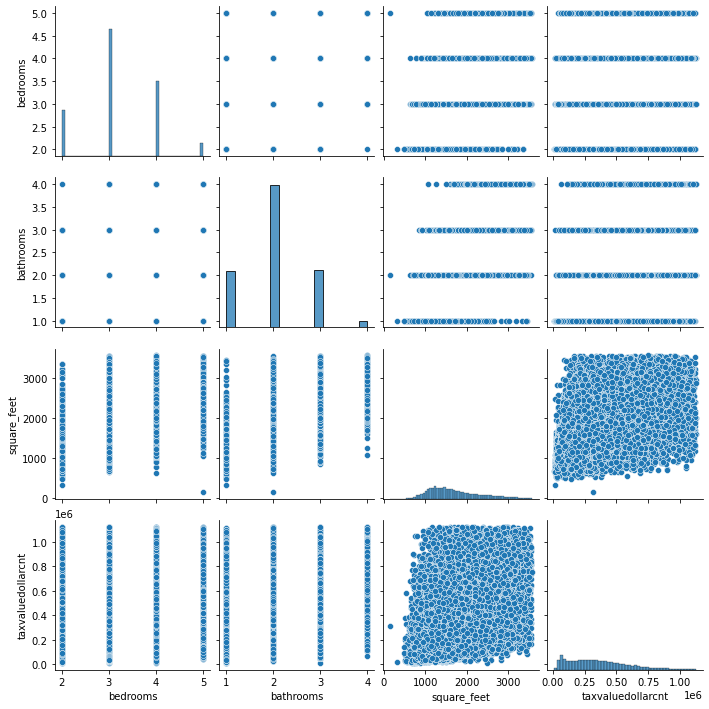

In [24]:
sns.pairplot(train)
plt.show()

In [25]:
#do not use
train.corr()


,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
bedrooms,1.000000,0.567852,0.601101,0.194362
bathrooms,0.567852,1.000000,0.745234,0.335169
square_feet,0.601101,0.745234,1.000000,0.444396
taxvaluedollarcnt,0.194362,0.335169,0.444396,1.000000


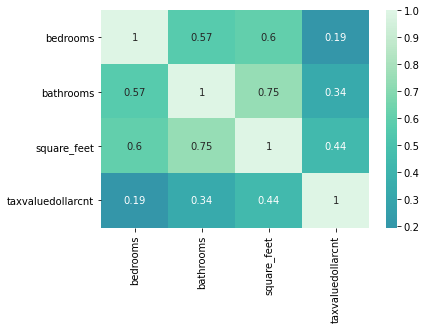

In [26]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

In [27]:
# stat test 1

In [28]:
from scipy import stats

In [29]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05

null_hypothesis = "taxvaluedollarcnt and bedrooms are independent"
alternative_hypothesis = "there is a relationship between taxvaluedollarcnt and bedrooms"

# Setup a crosstab of taxval to bedrooms
observed = pd.crosstab(train.bedrooms, train.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that taxvaluedollarcnt and bedrooms are independent", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that taxvaluedollarcnt and bedrooms are independent taxvaluedollarcnt and bedrooms are independent
Sufficient evidence to move forward understanding that there is a relationship between taxvaluedollarcnt and bedrooms


In [30]:
alpha = 0.05

null_hypothesis = "bathrooms and bedrooms are independent"
alternative_hypothesis = "there is a relationship between bathrooms and bedrooms"

# Setup a crosstab of taxval to bedrooms
observed = pd.crosstab(train.bedrooms, train.bathrooms)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that bathrooms and bedrooms are independent", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that bathrooms and bedrooms are independent bathrooms and bedrooms are independent
Sufficient evidence to move forward understanding that there is a relationship between bathrooms and bedrooms


In [31]:
alpha = 0.05

null_hypothesis = "taxvaluedollarcnt and square feet are independent"
alternative_hypothesis = "there is a relationship between taxvaluedollarcnt and square feet"

# Setup a crosstab of taxvalue to bedrooms
observed = pd.crosstab(train.square_feet, train.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that taxvaluedollarcnt and square feet are independent", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that taxvaluedollarcnt and square feet are independent taxvaluedollarcnt and square feet are independent
Sufficient evidence to move forward understanding that there is a relationship between taxvaluedollarcnt and square feet


In [32]:
# Modeling

In [33]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings("ignore")

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'X_train' is not defined

In [ ]:
train.taxvaluedollarcnt.mean()

In [ ]:
X_train = train.drop(columns=['taxvaluedollarcnt'])
y_train = train.taxvaluedollarcnt

X_validate = validate.drop(columns=['taxvaluedollarcnt'])
y_validate = validate.taxvaluedollarcnt

X_test = test.drop(columns=['taxvaluedollarcnt',])
y_test = test.taxvaluedollarcnt

In [ ]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict pred_mean
pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['pred_mean'] = pred_mean
y_validate['pred_mean'] = pred_mean

# 2. compute pred_median
pred_median = y_train['taxvaluedollarcnt'].median()
y_train['pred_median'] = pred_median
y_validate['pred_median'] = pred_median

# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

In [ ]:
# mean for baseline

### OLS

In [ ]:
# Create model
lm = LinearRegression(normalize=True,)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvalue_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvalue_pred_lm)**(1/2)

# predict validate
y_validate['taxvalue_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvalue_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

### LassoLars

In [ ]:
# create the model object
lars = LassoLars(alpha=50)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvalue_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvalue_pred_lars)**(1/2)

# predict validate
y_validate['taxvalue_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvalue_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: LassoLars")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()